# Challenges in Machine Learning

## Agenda:
***
* What is Imbalanced Data
* Dealing with imbalanced data
    * Evaluation Metrics
    * Resampling Techniques
    * Algorithmic Techniques
* Dealing with small datasets
* Values of K in K-Fold validation
* Do we need hundreds of classifiers?

## John and Lucius again
***
John and Lucius were finally out, in a nice looking pub, having drinks that were promised but never delivered to them. Having studied about all the cool algorithms, John was now pondering upon his journey. No amount of machine learning would have been able to predict his journey from house hunting to learning about ML algorithms. At least that's what he believed!

## John and Lucius again
***
John, now seriously considering a career in ML and data science started thinking about all the practical challenges ML professionals would come across. One of the first ones that came to his mind was: "What if the classes in a classification problem were really skewed towards one of the classes?" He told about this to Lucius. Lucius wanted to enjoy his drinks for once, but looking at John's enthusiasm, he realized that he had no choice. "Imbalanced Datasets", he muttered reluctantly and started explaining:

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Imbalanced Data
***

* Imbalanced Data is a slightly inaccurate term we use to describe datasets where the distribution of the target variable is imbalanced.
* This is most visible and easily detected for binary classification tasks, where most of the instances (data points) belong to one of the classes.


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Imbalanced Data
***
* Class-imbalance regularly occurs in datasets pertaining to multi-class classification tasks as well.
* Detecting it in Regression tasks can take a little more effort, and plotting a histogram of the target variable is a good starting point.

## Examples
***
Imbalanced datasets frequently occur in

* Anomaly detection
    * Electricity pilferage
    * Fraudulent transactions in banks
* Predicting Rare events
    * Ad click-through-rate (CTR) prediction (~1%)
    * Identification of rare diseases
    * User Churn (for example, usera churn is ~2% in telecom industry)


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Understanding Imbalanced Data
***
Let's look at detection of credit card fraud to understand this in more detail, said Lucius recalling his encounter with such a problem.

* Credit card fraud is a widespread problem and accounts for millions of dollars in loss.
* But, given the extremely high number of credit card transactions everyday, fraudulent transactions represent only a small fraction.


* Even then, fraudulent transactions have an outsized impact on the revenue, because
* Almost the entire value of a fraudulent transaction counts towards loss (less insurance), whereas
* The profit from a genuine transaction is a fraction of the total transaction value.


* Thus it's more important to recall fraudulent transactions, even if that means we'll end up labeling some genuine transactions as fraud 
* This is more of a business call, actually, depending on a wide range of factors

* Even though the typical datasets recording credit card transaction are very large (millions of row), the number of fraudulent records tends to be a very small fraction of the datasets - around 1% to 2%.
* Thus, if a given dataset of credit card transactions has a million row, only about 10,000 of them will be from fraudulent transactions.

So what? blurted John, I can still train a model and try and predict if a transaction in fraudulent or not. Yes, you can, but that is likely to give you not-so-good results, said Lucius. Let me explain.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Consequences of imbalanced classes:
***
**Bias in the model towards dominant class**

* Most machine learning models will end up predicting most of the transactions as genuine as they end up learning from mostly positive instances.
* Accounting for this in the way the model sees the data (resampling strategies) or the way it learns (error metric, algorithmic tweaks) can help us build models that are better at predicting the minor class.



<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Consequences of imbalanced classes:
***
**Difficulty in assessing model performance**

* For the credit card dataset discussed before, if we classify all transactions as genuine, we might still have an accuracy of 99%! (Bias towards dominant class)
* Let's look at a problem we are more likely to encounter in practice. 
* Suppose we have built two models, A and B, to predict fraudulent transactions, and we want to select the one with better performance.



<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Consequences of imbalanced classes:
***
**Model A**

* Of the 99% genuine transactions, this model predicts 98.5% correctly
* Of the 1% fraudulent transactions, this model predicts 0.25% correctly

**Model accuracy: 98.75%**

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Consequences of imbalanced classes:
***
**Model B**
* Of the 99% genuine transactions, this model predicts 98.25% correctly
* Of the 1% fraudulent transactions, this model predicts 0.5% correctly

**Model accuracy: 98.75%**

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Consequences of imbalanced classes:
***
* **Which of these two models performs better?**
* **Which one of these two should we use?**


* Clearly Model B is more valuable to us, but Accuracy, one of the most common metrics used in classification, fails to reflect that.
* We need to use a metric that not only captures the class imbalance better, but one that also lets us make meaningful trade-offs between precision and recall.

"Hmmm... Interesting..." said John, scratching head, "So how do we deal with such a dataset?"

Lucius tried to recall a few techniques he studied in college. After some time he started:

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Dealing with Imbalanced Data
***
Here are the ways to handle the imbalanced data

* More suited error metrics (comparatively immune to class imbalance)
* Resampling strategies
* Algorithmic techniques
* Buy/Collect more data

Let's look at them one by one.

## More Appropriate Error Metrics
***
The idea is to choose an error metric that is immune to class imbalance. As we saw earlier, accuracy is something that is not very robust against class imbalance. Following are a few examples of such error metrics

1. Confusion Matrix
2. Precision / Recall / Sensitivity / Specificity
3. AUC ROC
4. f1 Score
5. Cohen's Kappa



We have already gone through all the metrics, except Cohen's kappa. So let's understand Cohen's kappa better.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Cohen’s Kappa:
***
* The Kappa statistic (or value) is a metric that compares an Observed Accuracy with an Expected Accuracy (random chance). 
* Let's understand how Cohen's kappa is defined using a confusion matrix
![](../images/image20.png)

* Here, let's say rows (A) are the predicted values and columns (B) are the actual values.
* Now let's understand observed accuracy and expected accuracy.

* Observed Accuracy is simply the number of instances that were classified correctly throughout the entire confusion matrix.

![](../images/image20.png)
![](../images/image19.png)

* Expected Accuracy is defined as the accuracy that any classifier would be expected to achieve by random chance.

Sounds confusing? Let's break this down.

Our classifier classifies 
* (a + b) observations as yes
* (c + d) observations as no


* Hence, the probability of a randomly chosen observation being classified as yes is (P1): (a + b) / (a + b + c + d)
* And, the probability of a randomly chosen observation being classified as no is (P2): (c + d) / (a + b + c + d)

Reality:
* (a + c) observations as yes
* (b + d) observations as no


* Hence, the probability of a randomly chosen observation being classified as yes is (P3): (a + c) / (a + b + c + d)
* And, the probability of a randomly chosen observation being classified as no is (P4): (b + d) / (a + b + c + d)

Probability of a randomly chosen sample being *CORRECTLY* classified is 

* when the classifier classifies it as yes AND it is in reality yes: P1*P3
* when the classifier classifies it as no AND it is in reality no: P2*P4

Hence, Expected probability of a randomly chosen sample being *CORRECTLY* classified is: P1 x P3 + P2 x P4

![](../images/image20.png)
![](../images/image23.png)

![](../images/image20.png)
![](../images/image23.png)
![](../images/image22.png)
![](../images/image21.png)

Great! now that we understand $P_o$ and $P_e$, Cohen's kappa is defined as

![](../images/image24.png)

* In essence, the kappa statistic is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth, controlling for the accuracy of a random classifier as measured by the expected accuracy. 
* Not only can this kappa statistic shed light into how the classifier itself performed, the kappa statistic for one model is directly comparable to the kappa statistic for any other model used for the same classification task.
* For any arbitrary accuracy value, more the Kappa value, better the performance.

Q: Here is an example of 2 classifiers with given confusion matrix. Which one do you think is performing better? 

**Classifier A**

![](../images/image25.png)

**CLassifier B**

![](../images/image27.png)

A: It is apparent that for given accuracy, classifier A is doing a much better job at classifying than classifier B, which is also reflected in higher Kappa value attained by classifier A

"Wow! that is an interesting metric to use!" said John. What else we can do? Lucius again went searching the attics of his mind, looking for some other techniques he had studies. And started recalling the resampling techniques.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Resampling Techniques
***

Resampling methods are techniques in which , we try to **reduce the proportion of the dominant class by undersampling** from it, or we try to **increase the proportion of the minor class by oversampling** from it.
However, some of the more successful approaches combine both oversampling and undersampling.

Let's have a look at them.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Undersampling:
***
Undersampling techniques try to balance out the classes by reducing the number of observations in the dominant classes. 

![](../images/image26.png)

## Undersampling
***
There are many undersampling techniques. Let's look at some of them.

* Random Undersampling
* Cluster Centroids
* Tomek Links

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Undersampling - Random Undersampling
***
Random undersampling is one of the most intuitive and naive methods for undersampling. This method works by randomly choosing the samples from dominant classes. Let's understand the random undersampling by a few examples.

**Example 1**
* Total number of observations: 1000
* Total number of classes: 2 (A, B)
* Size of class A: 975
* Size of class B: 25
* Proportion of Minor class: 2.5%

**Sampled Dataset**
* From A, select 475 points randomly
* From B, select all 25 points
* Proportion of Minor class: 5%

**Example 2**
* Total number of observations: 1000
* Total number of classes: 3 (A, B, C)
* Size of class A: 925
* Size of class B: 25
* Size of class C: 50
* Proportion of Minor classes: 2.5% (B) and 5% (C)

**Sampled Dataset**
* From A, select 425 points randomly
* From B, select all 25 points
* From C, select all 50 points
* Proportion of Minor class: 5% (B) and 10% (C)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
loan_predition = pd.read_csv("../data/loan_prediction.csv", )
loan_predition.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [4]:
label_enc = LabelEncoder()
for column in loan_predition.select_dtypes(include=["object"]).columns.values:
    loan_predition[column] = label_enc.fit_transform(loan_predition[column])

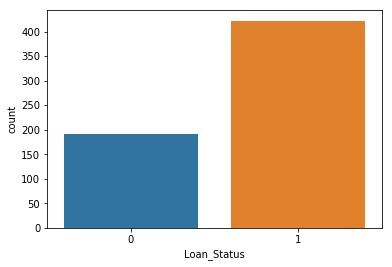

In [5]:
sns.countplot(loan_predition.Loan_Status);

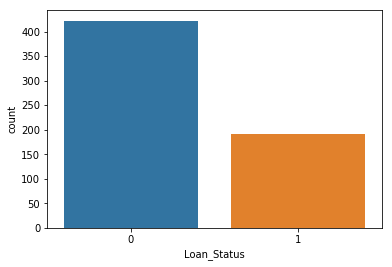

In [6]:
loan_predition.replace({0:1, 1:0}, inplace=True)
# index_values = loan_predition[loan_predition.Loan_Status == 1][100:].index.values
# loan_predition = loan_predition.drop(loan_predition.index[list(index_values)])
sns.countplot(loan_predition.Loan_Status);

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(loan_predition.iloc[:,:-1], 
                                                    loan_predition.iloc[:,-1], 
                                                    random_state=9)

In [52]:
rf = RandomForestClassifier(random_state=9)
rf.fit(X_train, y_train)
print "f1_score", f1_score(y_test, rf.predict(X_test))
print precision_score(y_test, rf.predict(X_test))
print recall_score(y_test, rf.predict(X_test))
print roc_auc_score(y_test, rf.predict(X_test))
print confusion_matrix(y_test, rf.predict(X_test))

f1_score 0.585365853659
0.774193548387
0.470588235294
0.701313535123
[[96  7]
 [27 24]]


In [169]:
rf = LogisticRegression(random_state=9)
rf.fit(X_train, y_train)
print "f1_score", f1_score(y_test, rf.predict(X_test))
print precision_score(y_test, rf.predict(X_test))
print recall_score(y_test, rf.predict(X_test))
print roc_auc_score(y_test, rf.predict(X_test))
print confusion_matrix(y_test, rf.predict(X_test))

f1_score 0.615384615385
0.7
0.549019607843
0.716257376737
[[91 12]
 [23 28]]


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Undersampling with `imblearn`:
***

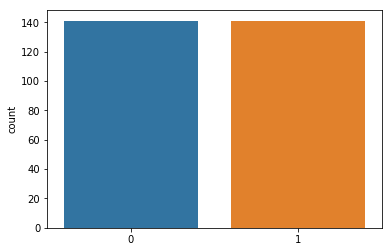

In [22]:
from imblearn.under_sampling import RandomUnderSampler

# Create the samplers
rus = RandomUnderSampler(random_state=9)
X_sample2, y_sample2 =  rus.fit_sample(X_train, y_train)
sns.countplot(y_sample2)

In [53]:
rf2 = RandomForestClassifier(random_state=9)
rf2.fit(X_sample2, y_sample2)
print "f1_score", f1_score(y_test, rf2.predict(X_test))
print precision_score(y_test, rf2.predict(X_test))
print recall_score(y_test, rf2.predict(X_test))
print roc_auc_score(y_test, rf2.predict(X_test))
print confusion_matrix(y_test, rf2.predict(X_test))

f1_score 0.5
0.510204081633
0.490196078431
0.628593184847
[[79 24]
 [26 25]]


In [62]:
rf2 = LogisticRegression(random_state=9)
rf2.fit(X_sample2, y_sample2)
print "f1_score", f1_score(y_test, rf2.predict(X_test))
print precision_score(y_test, rf2.predict(X_test))
print recall_score(y_test, rf2.predict(X_test))
print roc_auc_score(y_test, rf2.predict(X_test))
print confusion_matrix(y_test, rf2.predict(X_test))

f1_score 0.602150537634
0.666666666667
0.549019607843
0.706548638873
[[89 14]
 [23 28]]


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Undersampling - Cluster Centroids
***
* This technique undersampled by creation of new samples. 
* Let’s understand how
    * Size of minority class: 200
    * Size of majority class: 1000
* Cluster centroids method works by creating 200 clusters of the majority class and returns the centroids of each of the clusters. Hence, rather than sampling from the original data points we get new representative sample 

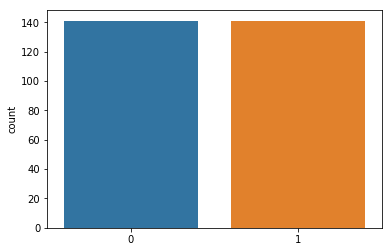

In [24]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=9)
X_sample3, y_sample3 = cc.fit_sample(X_train, y_train)
sns.countplot(y_sample3)

In [63]:
rf3 = RandomForestClassifier(random_state=9)
rf3.fit(X_sample3, y_sample3)
print "f1_score", f1_score(y_test, rf3.predict(X_test))
print precision_score(y_test, rf3.predict(X_test))
print recall_score(y_test, rf3.predict(X_test))
print roc_auc_score(y_test, rf3.predict(X_test))
print confusion_matrix(y_test, rf3.predict(X_test))

f1_score 0.537931034483
0.414893617021
0.764705882353
0.615362649914
[[48 55]
 [12 39]]


In [64]:
rf3 = LogisticRegression(random_state=9)
rf3.fit(X_sample3, y_sample3)
print "f1_score", f1_score(y_test, rf3.predict(X_test))
print precision_score(y_test, rf3.predict(X_test))
print recall_score(y_test, rf3.predict(X_test))
print roc_auc_score(y_test, rf3.predict(X_test))
print confusion_matrix(y_test, rf3.predict(X_test))

f1_score 0.623853211009
0.586206896552
0.666666666667
0.716828478964
[[79 24]
 [17 34]]


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Undersampling - Tomek Links
***
* Tomek Links are pairs of instances of opposite classes who are their own nearest neighbors.
* This technique identifies Tomek Links and gets rid of the majority samples.
* The idea is to clarify the border between the minority and majority classes, making the minority region(s) more distinct. 

![](../images/image31.png)

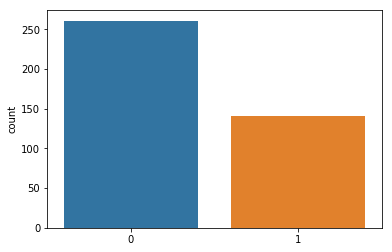

In [26]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(random_state=9, ratio='not minority')
X_sample4, y_sample4 = tl.fit_sample(X_train, y_train)
sns.countplot(y_sample4)

In [45]:
from sklearn.linear_model import LogisticRegression

In [65]:
rf4 = RandomForestClassifier()
rf4.fit(X_sample4, y_sample4)
print "f1_score", f1_score(y_test, rf4.predict(X_test))
print precision_score(y_test, rf4.predict(X_test))
print recall_score(y_test, rf4.predict(X_test))
print roc_auc_score(y_test, rf4.predict(X_test))
print confusion_matrix(y_test, rf4.predict(X_test))

f1_score 0.53488372093
0.657142857143
0.450980392157
0.667237768894
[[91 12]
 [28 23]]


In [66]:
rf4 = LogisticRegression()
rf4.fit(X_sample4, y_sample4)
print "f1_score", f1_score(y_test, rf4.predict(X_test))
print precision_score(y_test, rf4.predict(X_test))
print recall_score(y_test, rf4.predict(X_test))
print roc_auc_score(y_test, rf4.predict(X_test))
print confusion_matrix(y_test, rf4.predict(X_test))

f1_score 0.622222222222
0.717948717949
0.549019607843
0.721111745669
[[92 11]
 [23 28]]


## Oversampling:
***
As opposed to undersamping, oversampling techniques try to make the classes balanced by enhancing the minority class using different techniques.

![](../images/image29.png)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Oversampling - Random Oversampling
***
Random oversampling selects the samples with replacement from the minority class.

**Example 1**

* Total number of observations: 1000
* Total number of classes: 2 (A, B)
* Size of class A: 975
* Size of class B: 25
* Proportion of Minor class: 2.5%

Sampled Dataset
* From A, select all 975 points
* From B, select 225 points with replacement
* Proportion of Minor class: 18.75%

**Example 2**

* Total number of observations: 1000
* Total number of classes: 3 (A, B, C)
* Size of class A: 925
* Size of class B: 25
* Size of class C: 50
* Proportion of Minor classes: 2.5% (B) and 5% (C)

**Sampled Dataset**
* From A, select all 925 points
* From B, select 225 points with replacement
* From C, select 450 points with replacement
* Proportion of Minor class: ~14% (B) and ~28% (C)

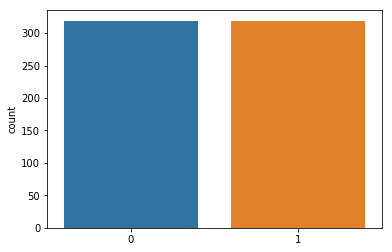

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=9)
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
sns.countplot(y_sample5)

In [48]:
rf5 = RandomForestClassifier(random_state=9)
rf5.fit(X_sample5, y_sample5)
print "f1_score", f1_score(y_test, rf5.predict(X_test))
print precision_score(y_test, rf5.predict(X_test))
print recall_score(y_test, rf5.predict(X_test))
print roc_auc_score(y_test, rf5.predict(X_test))
print confusion_matrix(y_test, rf5.predict(X_test))

f1_score 0.615384615385
0.7
0.549019607843
0.716257376737
[[91 12]
 [23 28]]


In [67]:
rf5 = LogisticRegression(random_state=9)
rf5.fit(X_sample5, y_sample5)
print "f1_score", f1_score(y_test, rf5.predict(X_test))
print precision_score(y_test, rf5.predict(X_test))
print recall_score(y_test, rf5.predict(X_test))
print roc_auc_score(y_test, rf5.predict(X_test))
print confusion_matrix(y_test, rf5.predict(X_test))

f1_score 0.602150537634
0.666666666667
0.549019607843
0.706548638873
[[89 14]
 [23 28]]


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Oversampling - SMOTE (Synthetic Minority Oversampling Technique)
***
* The original paper: [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf)
* The minority class is over-sampled by creating synthetic examples rather than by over-sampling with replacement.
* It generates synthetic examples in a less application-specific manner, by operating in feature space rather than data space.
* The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors.

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## How SMOTE works:
***
* Take the difference between the feature vector (sample) under consideration and its nearest neighbor.
* Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration.
* This causes the selection of a random point along the line segment between two specific features.
![](../images/image32.png)

* Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen.
* For instance, if the amount of over-sampling needed is 200%, only two neighbors from the five nearest neighbors are chosen and one sample is generated in the direction of each.
* NOTE: this k becomes a hyperparameter for SMOTE algorithm

* Limitation: Because it operates by interpolating between rare examples.
* Hence, it can only generate examples within the body of available examples—never outside.

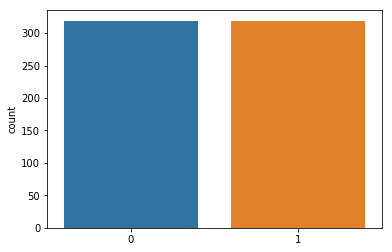

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9, kind="borderline2")
X_sample6, y_sample6 = smote.fit_sample(X_train, y_train)
sns.countplot(y_sample6)

In [43]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [44]:
rf6 = RandomForestClassifier(random_state=9)
rf6.fit(X_sample6, y_sample6)
print "f1_score", f1_score(y_test, rf6.predict(X_test))
print precision_score(y_test, rf6.predict(X_test))
print recall_score(y_test, rf6.predict(X_test))
print roc_auc_score(y_test, rf6.predict(X_test))
print confusion_matrix(y_test, rf6.predict(X_test))

f1_score 0.622222222222
0.717948717949
0.549019607843
0.721111745669
[[92 11]
 [23 28]]


In [68]:
rf6 = LogisticRegression(random_state=9)
rf6.fit(X_sample6, y_sample6)
print "f1_score", f1_score(y_test, rf6.predict(X_test))
print precision_score(y_test, rf6.predict(X_test))
print recall_score(y_test, rf6.predict(X_test))
print roc_auc_score(y_test, rf6.predict(X_test))
print confusion_matrix(y_test, rf6.predict(X_test))

f1_score 0.621359223301
0.615384615385
0.627450980392
0.716638111555
[[83 20]
 [19 32]]


## Algorithmic Approach
***
In algorithmic approach, we use different techniques to tweak the algorithms to make them learn minority classes 

## Algorithmic Approach - Cost Sensitive Training (Penalised Training): 
***
* One way to do so is to create a custom metric which penalizes wrong predictions in the minority class.
* Recall the metric the we defined while discussing the metrics of evaluation:
* metric=(5 ∗ false negative + 1 ∗ false positive) / 6
* Such metrics could be used in handling the imbalanced datasets.
* sklearn provides a method to device custom metrics.

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Algorithmic Approach - Choice of Algorithm:
***
* Ensemble methods, especially Random Forests are found to be good at handling imbalanced datasets
* These methods are able to learn classes based on importance assigned to them.
* sklearn's implementations of these algorithms provides option to handle imbalanced dataset by setting the **`class_weight`** parameter.


In [141]:
class_wts = range(50)
f1s = []
auc = []
for wt in class_wts:
    rf7 = RandomForestClassifier(random_state=9, class_weight={0:wt,1:1})
    rf7.fit(X_train, y_train)
    f1s.append(f1_score(y_test, rf7.predict(X_test)))
    auc.append(roc_auc_score(y_test, rf7.predict(X_test)))

f1_score 0.674698795181
0.875
0.549019607843
0.755092328193
[[99  4]
 [23 28]]


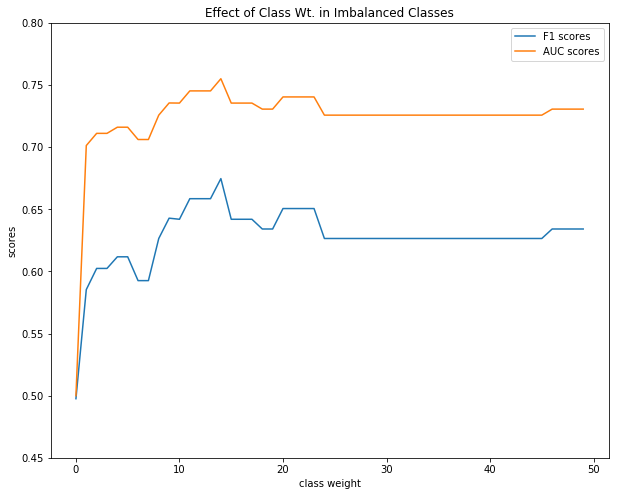

In [167]:
plt.figure(figsize=(10, 8))
plt.plot(class_wts, f1s, label="F1 scores")
plt.plot(class_wts, auc, label="AUC scores")
plt.xlabel("class weight")
plt.ylabel("scores")
plt.title("Effect of Class Wt. in Imbalanced Classes")
plt.ylim(0.45, 0.8)
plt.legend()
plt.show()

## Some Useful tips:
***
* While carrying out cross-validation, make stratified folds to make sure the presence of minority class in all folds
* Instead of predictions, get probabilities from the trained classifier.
* Study the AUC-ROC curve and adjust the prediction threshold

"Phew! that was a lot of techniques to understand in one go!", John already looked overwhelmed. Lucius, smiling mildly, just added: "and we just scratched the surface". There are a lot more techniques that can be employed. It might be worth checking out `imblearn's` official documentation.

## Off to other challenges
***
After concluding the discussion on imbalanced datasets, John started wondering about some more problems that can come along the way. He remembered being told again and again how important the data is for any ML problem. He immediately started thinking what if there is too little data?

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Dealing with Smaller Datasets:
***
Sometimes, challenge arises not because of too much data, but because of too less data. Such a scenario is known as  **the curse of dimensionality**, which essentially means **number of features >> number of observations**


* In case of such small datasets, following are some of the techniques that could come in handy
    * Exploit Bootstrapping
    * Use Simpler, Regularized Models
    * Use Ensemble Techniques
    * Use Support Vector Machines

## Value of K in Koolness
***
What is the value of k in k-fold validation that should be used?

## Optimum Value of K in K-Fold Validation:
***
* Refresher: Why do we use cross-validation?
* Trade-off:
    * Higher K: More samples to train, more cross-validation, results in less bias, high variance but requires more computations
    * Lower K: Less samples to train, less cross-validation, results in more bias, low variance but requires less computations

## Optimum Value of K in K-Fold Validation:
***
* According to paper [A Study of Cross Validation and Bootstrap for Accuracy Estimation and Model Selection](http://robotics.stanford.edu/~ronnyk/accEst.pdf), value of k=10 is a good balance between accuracy and training time
* Stratified k-fold seems to perform better
![](../images/image33.png)

## Optimum Value of K in K-Fold Validation:
***

* [Here](https://vinhkhuc.github.io/2015/03/01/how-many-folds-for-cross-validation.html) is a python implementation of the same experiment for iris dataset.
* For smaller datasets, usually leave-one-out validation works fine.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## The Age old Question - Which Algorithm to Use?
***
Having studied a bunch of algorithms is good, but choosing which one to use is not! Let's understand which algorithms perform better in which scenarios.

## Which Algorithm to Use? - A perspective from a Research Paper
***
In [this](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) paper,
The researchers evaluated **179 classifiers** arising from **17 families**, implemented in Weka, R, C and Matlab.
They used **121 datasets**, which represent the whole UCI database and other real problems, in order to achieve significant conclusions about the classifier behavior, not dependent on the data set collection.

## Which Algorithm to Use? - A perspective from a Research Paper
***
**Key Findings:**

* The classifiers most likely to be the bests are the random forest (RF) versions, the best of which achieves 94.1% of the maximum accuracy overcoming 90% in the 84.3% (102 out of 121) of the data sets.
* The SVM with Gaussian kernel (implemented in C using LibSVM) achieves 92.3% of the maximum accuracy.

## Which Algorithm to Use? - A perspective from a Research Paper
***
A few models are clearly better than the remaining ones:
* Random forest
* SVM with Gaussian and polynomial kernels
* C5.0 decision tree
* avNNet (the multi-layer perceptron)

## Which Algorithm to Use? - A perspective from a Research Paper
***
**Paper Summary**

* The random forest was found to be clearly the best family of classifiers (3 out of 5 bests classifiers are RF), followed by SVM (4 classifiers in the top-10), neural networks and boosting ensembles (5 and 3 members in the top-20, respectively).

## Which Algorithm to Use? - Some practical Tips
***
So far we have learnt about a bunch of algorithms. We have learnt about 2 families of algorithm
    * Linear Models
    * Ensemble Models

The question is then which algorithm to use and when? Let’s have a look at some quick ideas


## Which Algorithm to Use? - Some practical Tips
***
Penalized linear regression methods have the advantage that they train very quickly. That helps us for 2 reasons
* Training times on large data sets can extend to hours, days, or even weeks.
* Long training times can stall development and deployment on large problems.
Training usually needs to be done several times before a deployable solution is arrived at.

## Which Algorithm to Use? - Some practical Tips
***
* Hence, rapid training time for penalized linear methods makes them useful for the obvious reason that shorter is better. 
* However, Depending on the problem, these methods may suffer some performance disadvantages relative to ensemble methods.
* Therefore, penalized linear methods can be a useful first step in your development process even in the circumstance where they yield inferior performance to ensemble methods.


## Which Algorithm to Use? - Some practical Tips
***
* Besides enjoying a training time advantage, penalized linear methods generate predictions much faster than ensemble methods. 
* Generating a prediction involves using the trained model. The trained model for penalized linear regression is simply a list of real numbers—one for each feature being used to make the predictions. 
* The number of floating‐point operations involved is the number of variables being used to make predictions. 
* For highly time‐sensitive predictions such as high‐speed trading or Internet ad insertions, computation time makes the difference between making money and losing money. 


## Which Algorithm to Use? - Some practical Tips
***
* On the other hand ensemble methods bring to the table the ability to work with nonlinear data
* We can also easily control the complexity of ensemble models by tuning the hyperparameters
* Also, ensemble methods come with the ability to tell apart important features from relatively redundant ones. Which is one of the huge advantages of ensemble methdos
* Hence, ensemble methods could be used as the final predictors after feature engineering and feature selection has been carried out


## Which Algorithm to Use? - Some practical Tips
***
![](../images/image34.png)

## Which Algorithm to Use? - Some practical Tips
***
![](../images/image35.png)

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />
# In-session Recap Time
***
* Imbalanced Data
* Resampling Techniques
* Undersampling & Oversampling
* Algorithmic Approach
* Dealing with smaller data sets
* Which Algorithm to use

# Thank You
***
### Next Session: 
For more queries - Reach out to academics@greyatom.com 